<a href="https://colab.research.google.com/github/VikaSvyat/DI_Bootcamp/blob/main/colab/Miniproject2_DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()



In [4]:

!unzip "Palmer Penguins Dataset.zip"

Archive:  Palmer Penguins Dataset.zip
  inflating: Palmer Penguins Dataset.csv  


In [88]:

# === IMPORTS ===
# pandas, numpy, seaborn, matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
!ls

'Palmer Penguins Dataset.csv'  'Palmer Penguins Dataset.zip'   sample_data


In [63]:

df = pd.read_csv('Palmer Penguins Dataset.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [51]:
print(df.shape)
print(df.info())


(344, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB
None


In [9]:
df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,344,344,342.000000,342.000000,342.000000,342.000000,333,344.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,152,168,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN,2008.029070
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN,0.818356
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,2009.000000


In [12]:
print(df['species'].value_counts())
print(df['island'].value_counts())
print(df['sex'].value_counts())

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
sex
male      168
female    165
Name: count, dtype: int64


In [65]:
# basic data cleaning
print(df.loc[df['bill_length_mm'].isna(), :])
print(f'\nThese {df['bill_length_mm'].isna().sum()} rows do not have all meaningful values, I drop them\n')

print(f"Before: {len(df)} rows")
df = df.dropna(subset=['bill_length_mm'])
print(f"After: {len(df)} rows")

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen             NaN            NaN                NaN   
271  Gentoo     Biscoe             NaN            NaN                NaN   

     body_mass_g  sex  year  
3            NaN  NaN  2007  
271          NaN  NaN  2009  

These 2 rows do not have all meaningful values, I drop them

Before: 344 rows
After: 342 rows


In [70]:
most_common = df['sex'].mode()[0]

print(f"Most common gender: {most_common}")

df['sex'] = df['sex'].fillna(most_common)
print(f"Missing gender now: {df['sex'].isna().sum()}")

Most common gender: male
Missing gender now: 0


***Species Distribution: Use a bar chart to show the distribution of penguin species.***


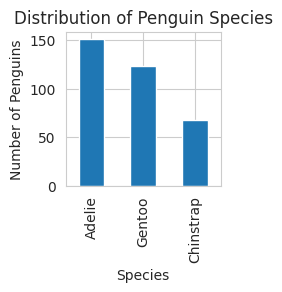

In [69]:
plt.figure(figsize=(2,2))

# Count number of penguins per species
species_counts = df['species'].value_counts()

# Plot bar chart
species_counts.plot(kind='bar')

plt.title('Distribution of Penguin Species')
plt.xlabel('Species')
plt.ylabel('Number of Penguins')
plt.show()


`From the bar chart, we can see which species are most common in the dataset.`

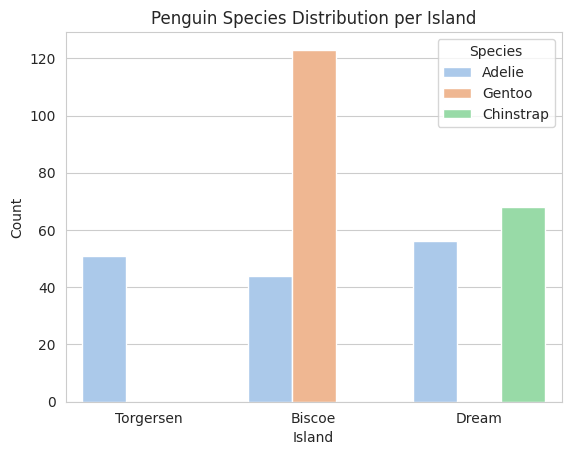

In [80]:
# Grouped bar chart: species counts per island
sns.countplot(data=df, x='island', hue='species', palette='pastel')

plt.title('Penguin Species Distribution per Island')
plt.xlabel('Island')
plt.ylabel('Count')
plt.legend(title='Species')
plt.show()

`Only Adelie lives on all the islands, while the rest live only on a specific island.`

***Island Distribution: Visualize the count of penguins on each island using a pie chart.***

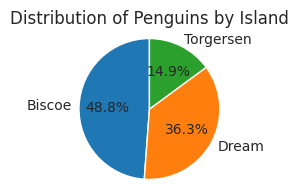

In [68]:
island_counts = df['island'].value_counts()

plt.figure(figsize=(2,2))

plt.pie(
    island_counts,
    labels=island_counts.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Distribution of Penguins by Island')
plt.axis('equal')  # makes pie circular
plt.show()


***Flipper Length vs. Body Mass: Create a scatter plot to analyze the relationship between flipper length and body mass, color-coded by species.***

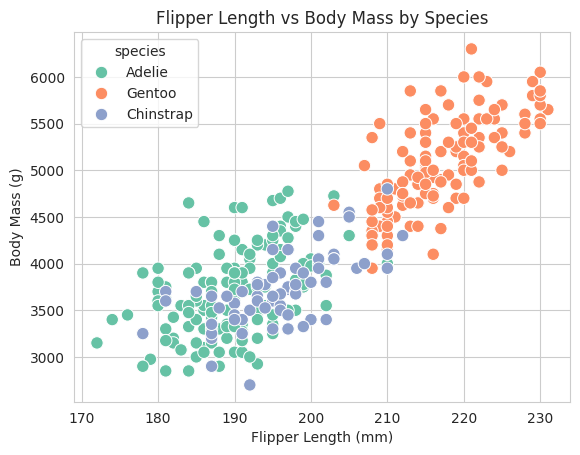

In [67]:
sns.scatterplot(
    data=df,
    x='flipper_length_mm',
    y='body_mass_g',
    hue='species',
    palette='Set2',
    s=80
)

plt.title('Flipper Length vs Body Mass by Species')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()

```
# Scatter plots show a strong positive correlation: Penguins with longer flippers usually have higher body mass.

Clusters by species are visible: Gentoo → largest flipper length and heaviest

```



***Sex Distribution within Species: Create grouped bar charts showing the distribution of sex within each penguin species.***

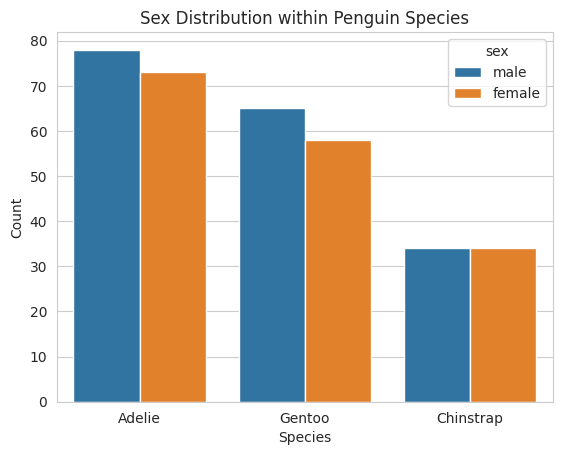

In [71]:
sns.countplot(
    data=df,
    x='species',
    hue='sex'
)

plt.title('Sex Distribution within Penguin Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()





```
Grouped bar charts show male vs. female proportions per species.
It is roughly balanced, but some species have more males in the sample.
```



***Heatmap of Correlations: Plot a heatmap to visualize the correlations between numerical variables.***

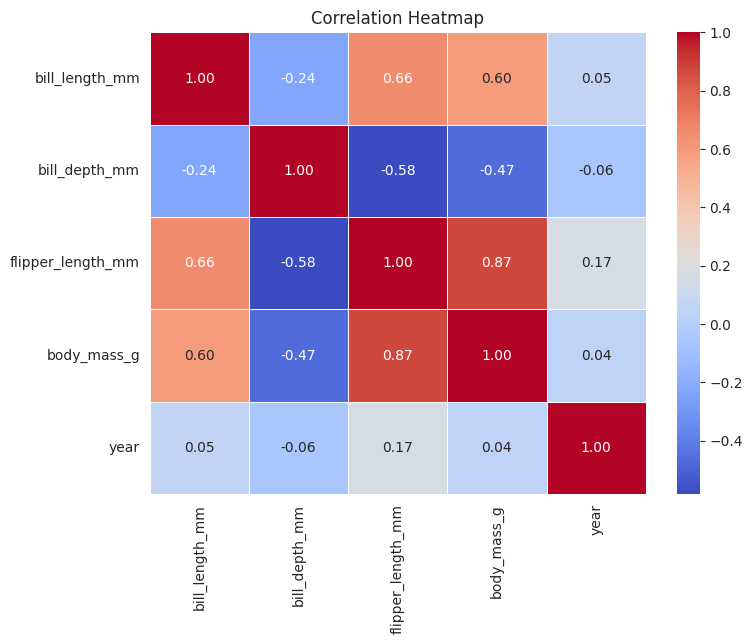

In [73]:
# Select only numeric columns
corr = df.select_dtypes(include='number').corr()

# Plot heatmap
plt.figure(figsize=(8,6))

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5
)
plt.title('Correlation Heatmap')
plt.show()

```
Shows a strong positive correlation between:
Flipper length and Body mass
Other variables, such as bill length vs. bill depth, show moderate correlation.
Year does not correlate with the measurements.
```

***Boxplots for Measurements: Generate boxplots for flipper length, body mass, and bill measurements, segmented by species.***

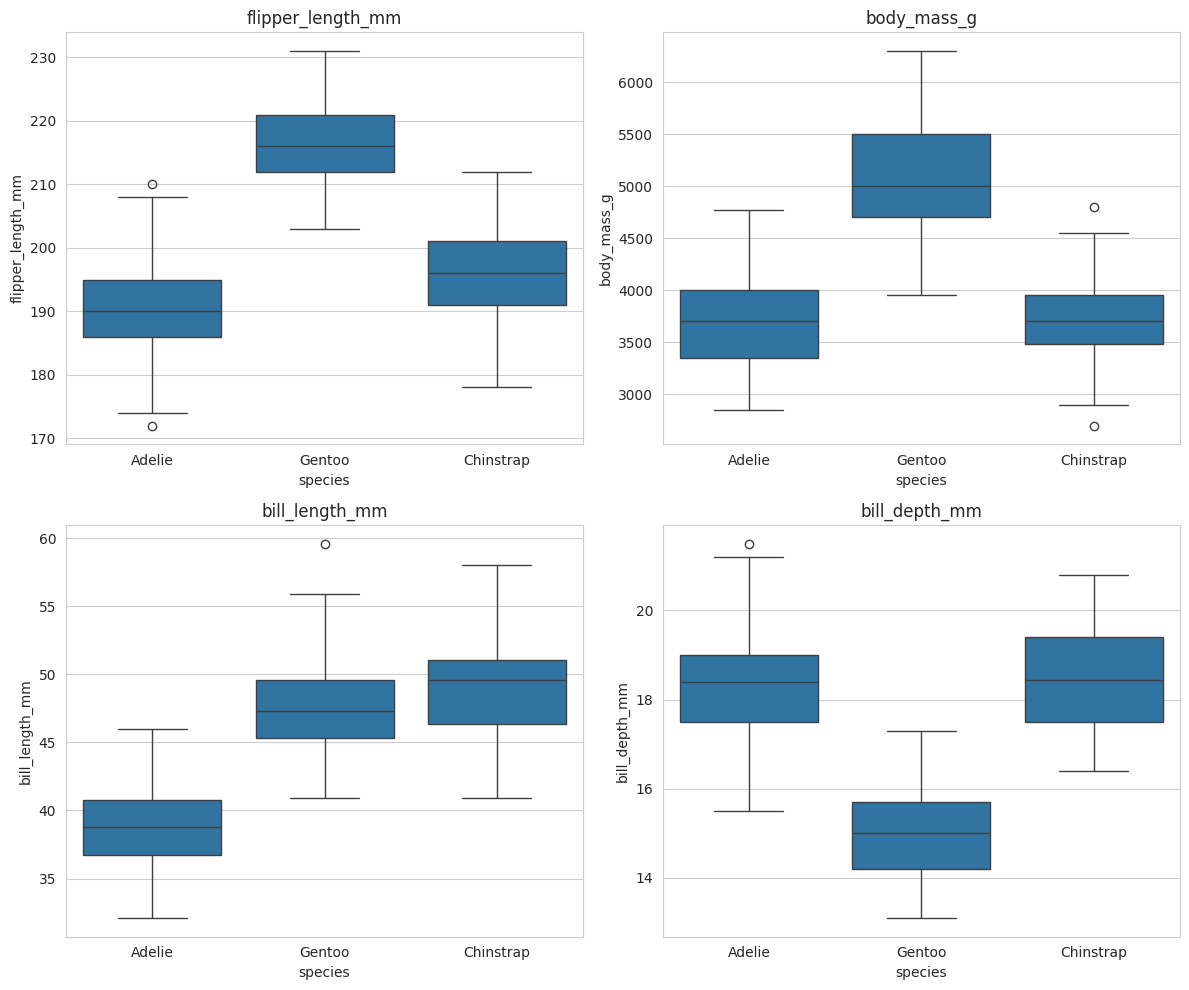

In [76]:
measurements = [
    'flipper_length_mm',
    'body_mass_g',
    'bill_length_mm',
    'bill_depth_mm'
]

plt.figure(figsize=(12,10))

for i, col in enumerate(measurements, 1):
    plt.subplot(2,2,i)
    sns.boxplot(data=df, x='species', y=col)
    plt.title(col)

plt.tight_layout()
plt.show()






```
Gentoo → largest median flipper length and body mass
Bill length and depth vary per species but less than flipper/body mass.
Penguins' parameters are even, with almost no outliers
```



***Histograms of Measurements: Create histograms to show the distribution of key measurements (bill length, bill depth, flipper length).***

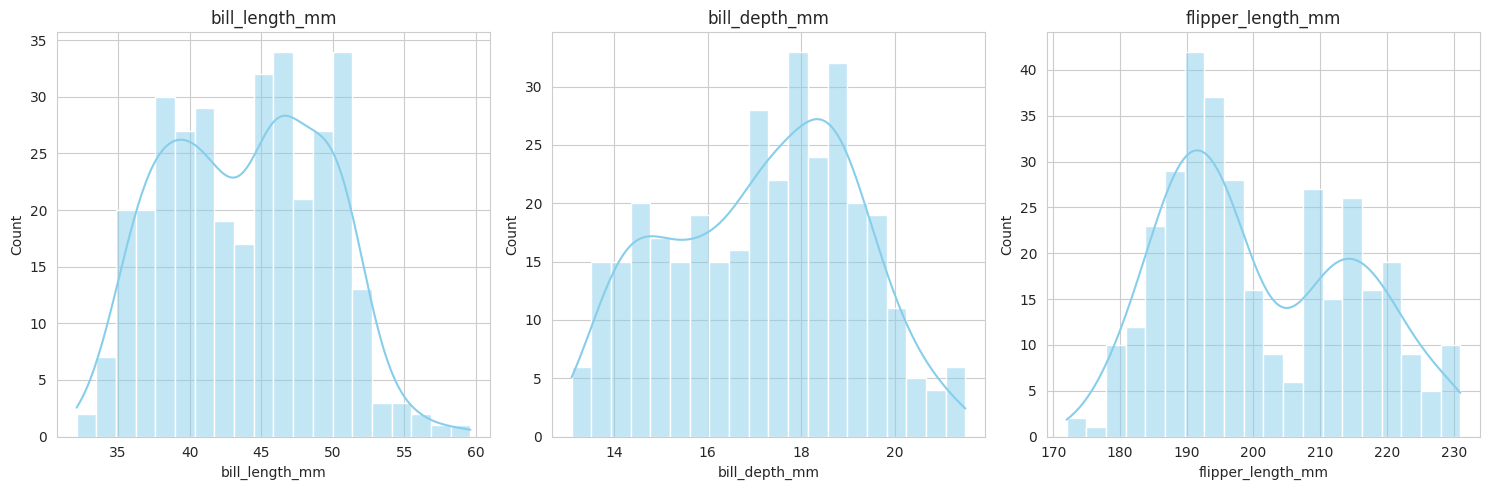

In [79]:
measurements = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']

plt.figure(figsize=(15,5))

for i, col in enumerate(measurements, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()



```
Flipper length and bill dimensions are roughly normal, but may be slightly skewed

```





---

---



*Next mini-project*


---


---



In [84]:
from google.colab import files
uploaded = files.upload()

Saving World Happiness Report Folder.zip to World Happiness Report Folder.zip


In [86]:
!unzip "World Happiness Report Folder.zip"

Archive:  World Happiness Report Folder.zip
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                
  inflating: 2019.csv                


In [87]:
!ls

 2015.csv   2018.csv			  'Palmer Penguins Dataset.zip'
 2016.csv   2019.csv			   sample_data
 2017.csv  'Palmer Penguins Dataset.csv'  'World Happiness Report Folder.zip'


In [ ]:

# pandas, numpy, seaborn, matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [151]:
df = pd.read_csv('2018.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [152]:
print(df.shape)
print(df.info())

(156, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB
None


In [153]:
df['Year']='2018' #I add column Year, because I have several datasets by year

In [154]:
print(df.shape)
print(df.info())

(156, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
 9   Year                          156 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 12.3+ KB
None


In [155]:
df_2019 = pd.read_csv('2019.csv')
print(df_2019.head())
print(df_2019.shape)
print(df_2019.info())

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                

In [156]:
df_2019['Year']='2019' #also for next year

In [157]:
print(df_2019.shape)
print(df_2019.info())

(156, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
 9   Year                          156 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 12.3+ KB
None


In [158]:
df = pd.concat([df_2019, df], ignore_index=True) #I verifed that both datasats have the same structure and merge them

In [159]:
print(df.shape)
print(df.info())

(312, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  312 non-null    int64  
 1   Country or region             312 non-null    object 
 2   Score                         312 non-null    float64
 3   GDP per capita                312 non-null    float64
 4   Social support                312 non-null    float64
 5   Healthy life expectancy       312 non-null    float64
 6   Freedom to make life choices  312 non-null    float64
 7   Generosity                    312 non-null    float64
 8   Perceptions of corruption     311 non-null    float64
 9   Year                          312 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 24.5+ KB
None


In [160]:
print(df.loc[df['Perceptions of corruption'].isna(), :])

print(f'median: {df['Perceptions of corruption'].median()}')

df['Perceptions of corruption'] = df['Perceptions of corruption'].fillna(df['Perceptions of corruption'].median())

#only one column and row has a missing value, I fill it with the median for this column

     Overall rank     Country or region  Score  GDP per capita  \
175            20  United Arab Emirates  6.774           2.096   

     Social support  Healthy life expectancy  Freedom to make life choices  \
175           0.776                     0.67                         0.284   

     Generosity  Perceptions of corruption  Year  
175       0.186                        NaN  2018  
median: 0.082


In [161]:
df.describe(include='all')


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
count,312.000000,312,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312
unique,NaN,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Finland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
freq,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156
mean,78.500000,NaN,5.391506,0.898298,1.211026,0.661295,0.423538,0.182926,0.111205,NaN
std,45.104737,NaN,1.114631,0.394592,0.300310,0.252724,0.156024,0.096739,0.095226,NaN
min,1.000000,NaN,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,39.750000,NaN,4.514250,0.609500,1.055750,0.488250,0.322500,0.108750,0.050000,NaN
50%,78.500000,NaN,5.379500,0.960000,1.265500,0.699000,0.449500,0.175500,0.082000,NaN
75%,117.250000,NaN,6.176000,1.219500,1.457500,0.858000,0.540250,0.245000,0.140250,NaN


***Global Happiness Scores: Create a bar chart of happiness scores across countries.***

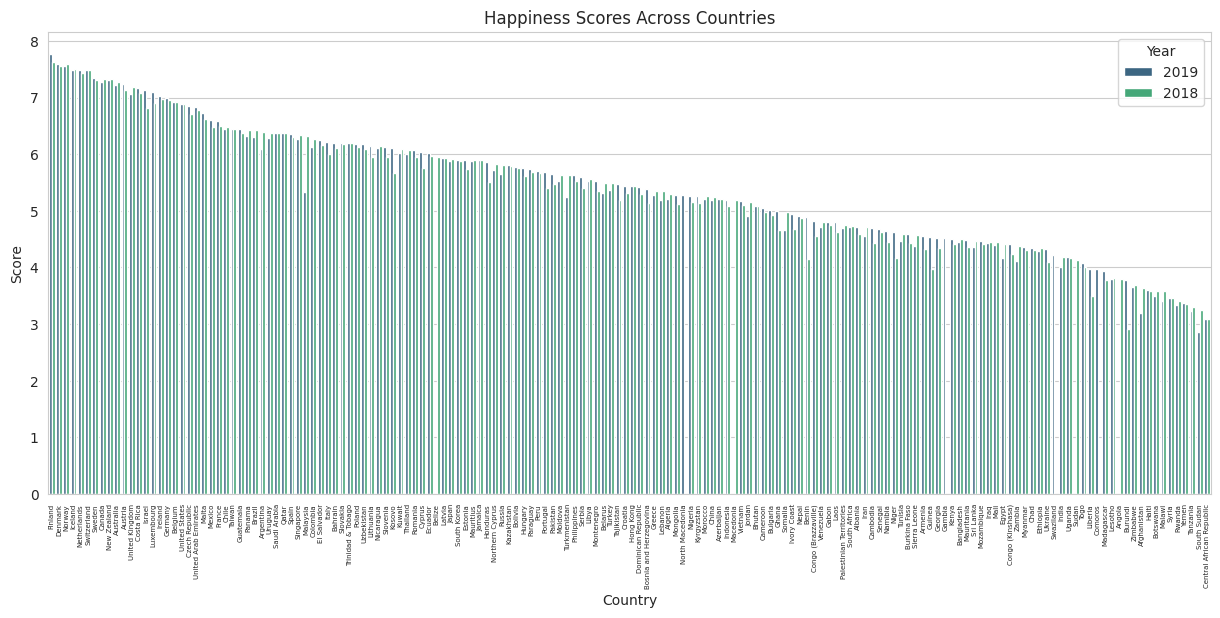

In [164]:
# Sort countries by Score
df_sorted = df.sort_values(by='Score', ascending=False).head(40)

sns.set_style("whitegrid")
plt.figure(figsize=(15,6))

sns.barplot(data=df_sorted, x='Country or region', hue='Year', y='Score', palette='viridis')

plt.title('Happiness Scores Across Countries')
plt.xlabel('Country')
plt.ylabel('Score')
plt.xticks(rotation=90, fontsize=5)
plt.show()




```
The sheer number of countries on the map makes the bar chart unreadable.
```



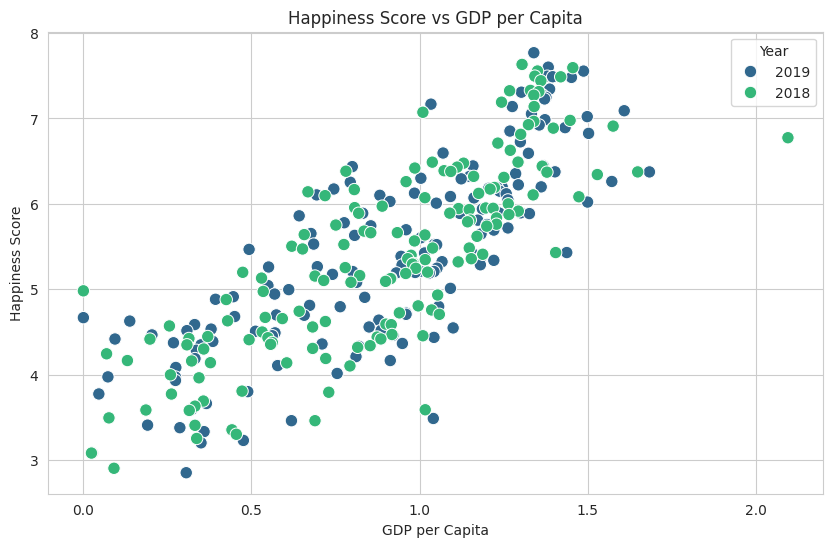

In [167]:
sns.set_style("whitegrid")

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='GDP per capita',
    y='Score',
    hue='Year',        # optional: color by year
    palette='viridis',
    s=80               # size of points
)

plt.title('Happiness Score vs GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend(title='Year')
plt.show()



```
GDP strongly positively correlates with happiness.
Countries with similar GDP can differ due to social support, health, freedom, generosity, or corruption perception.
```



In [170]:
df['Country or region'].unique()

array(['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands',
       'Switzerland', 'Sweden', 'New Zealand', 'Canada', 'Austria',
       'Australia', 'Costa Rica', 'Israel', 'Luxembourg',
       'United Kingdom', 'Ireland', 'Germany', 'Belgium', 'United States',
       'Czech Republic', 'United Arab Emirates', 'Malta', 'Mexico',
       'France', 'Taiwan', 'Chile', 'Guatemala', 'Saudi Arabia', 'Qatar',
       'Spain', 'Panama', 'Brazil', 'Uruguay', 'Singapore', 'El Salvador',
       'Italy', 'Bahrain', 'Slovakia', 'Trinidad & Tobago', 'Poland',
       'Uzbekistan', 'Lithuania', 'Colombia', 'Slovenia', 'Nicaragua',
       'Kosovo', 'Argentina', 'Romania', 'Cyprus', 'Ecuador', 'Kuwait',
       'Thailand', 'Latvia', 'South Korea', 'Estonia', 'Jamaica',
       'Mauritius', 'Japan', 'Honduras', 'Kazakhstan', 'Bolivia',
       'Hungary', 'Paraguay', 'Northern Cyprus', 'Peru', 'Portugal',
       'Pakistan', 'Russia', 'Philippines', 'Serbia', 'Moldova', 'Libya',
       'Montenegro', 'Tajikis

In [197]:
country_to_region = {
    # Europe
    'Finland': 'Europe','Denmark': 'Europe','Norway': 'Europe','Iceland': 'Europe',
    'Netherlands': 'Europe','Switzerland': 'Europe','Sweden': 'Europe',
    'Austria': 'Europe','Luxembourg': 'Europe','United Kingdom': 'Europe',
    'Ireland': 'Europe','Germany': 'Europe','Belgium': 'Europe',
    'Czech Republic': 'Europe','Malta': 'Europe','Spain': 'Europe',
    'Italy': 'Europe','Slovakia': 'Europe','Poland': 'Europe',
    'Lithuania': 'Europe','Slovenia': 'Europe','Latvia': 'Europe',
    'Estonia': 'Europe','Hungary': 'Europe','Romania': 'Europe',
    'Cyprus': 'Europe','Greece': 'Europe','North Macedonia': 'Europe',
    'Serbia': 'Europe','Bosnia and Herzegovina': 'Europe','Croatia': 'Europe',
    'Montenegro': 'Europe','Belarus': 'Europe','Russia': 'Europe',
    'Moldova': 'Europe','Kosovo': 'Europe','Bulgaria': 'Europe',
    'Albania': 'Europe','Northern Cyprus': 'Europe','France': 'Europe',
    'Portugal': 'Europe','Macedonia': 'Europe','Ukraine': 'Europe',

    # North America
    'Canada': 'North America','United States': 'North America','Mexico': 'Latin America',
    'Costa Rica': 'Latin America','Guatemala': 'Latin America','El Salvador': 'Latin America',
    'Honduras': 'Latin America','Nicaragua': 'Latin America','Panama': 'Latin America',
    'Belize': 'Latin America','Jamaica': 'Latin America','Trinidad & Tobago': 'Latin America',
    'Dominican Republic': 'Latin America','Haiti': 'Latin America',

    # South America
    'Brazil': 'Latin America','Argentina': 'Latin America','Chile': 'Latin America',
    'Colombia': 'Latin America','Ecuador': 'Latin America','Peru': 'Latin America',
    'Uruguay': 'Latin America','Venezuela': 'Latin America','Bolivia': 'Latin America',
    'Paraguay': 'Latin America',

    # Middle East
    'Israel': 'Middle East','United Arab Emirates': 'Middle East','Saudi Arabia': 'Middle East',
    'Qatar': 'Middle East','Kuwait': 'Middle East','Bahrain': 'Middle East',
    'Jordan': 'Middle East','Lebanon': 'Middle East','Syria': 'Middle East',
    'Yemen': 'Middle East','Palestinian Territories': 'Middle East','Turkey': 'Middle East', 'Iraq': 'Middle East',

    # Asia (rest of Asia not in Middle East)
    'Thailand': 'Asia','Malaysia': 'Asia','Philippines': 'Asia','South Korea': 'Asia',
    'Japan': 'Asia','Kazakhstan': 'Asia','Uzbekistan': 'Asia','Pakistan': 'Asia','China': 'Asia',
    'Vietnam': 'Asia','Bhutan': 'Asia','Cambodia': 'Asia','Iran': 'Asia','Bangladesh': 'Asia',
    'Sri Lanka': 'Asia','Myanmar': 'Asia','Nepal': 'Asia','Tajikistan': 'Asia','Kyrgyzstan': 'Asia',
    'Turkmenistan': 'Asia','Indonesia': 'Asia','India': 'Asia','Taiwan': 'Asia','Mongolia': 'Asia',
    'Azerbaijan': 'Asia','Laos': 'Asia','Georgia': 'Asia','Armenia': 'Asia','Northern Cyprus': 'Europe',
    'Hong Kong': 'Asia', 'Singapore': 'Asia', 'Afghanistan': 'Asia', 'India': 'Asia', 'Sri Lanka': 'Asia',

    # Africa
    'Nigeria': 'Africa','Libya': 'Africa','Morocco': 'Africa','Algeria': 'Africa',
    'South Africa': 'Africa','Ghana': 'Africa','Ivory Coast': 'Africa',
    'Cameroon': 'Africa','Senegal': 'Africa','Kenya': 'Africa','Egypt': 'Africa',
    'Togo': 'Africa','Namibia': 'Africa','Mozambique': 'Africa','Ethiopia': 'Africa',
    'Sudan': 'Africa','Uganda': 'Africa','Zambia': 'Africa','Burundi': 'Africa',
    'Tunisia': 'Africa','Mali': 'Africa','Benin': 'Africa','Gambia': 'Africa',
    'Somalia': 'Africa','Rwanda': 'Africa','Zimbabwe': 'Africa','Malawi': 'Africa',
    'Liberia': 'Africa','Botswana': 'Africa','Mauritius': 'Africa','Madagascar': 'Africa',
    'Congo (Brazzaville)': 'Africa','Gabon': 'Africa','Niger': 'Africa','Burkina Faso': 'Africa',
    'Guinea': 'Africa','Mauritania': 'Africa','Congo (Kinshasa)': 'Africa','Sierra Leone': 'Africa',
    'Chad': 'Africa','Swaziland': 'Africa','Comoros': 'Africa','Lesotho': 'Africa',
    'Tanzania': 'Africa','Angola': 'Africa','Central African Republic': 'Africa','South Sudan': 'Africa',

    # Oceania
    'Australia': 'Oceania','New Zealand': 'Oceania'
}


In [198]:
df['Region'] = df['Country or region'].map(country_to_region)


In [200]:
# Check rows where 'Region' is missing
missing_regions = df[df['Region'].isna()]

# See which countries are missing
missing_countries = missing_regions['Country or region'].unique()
print(missing_countries)


[]


In [207]:
# Group by Region and get unique countries
countries_by_region = df.groupby('Region')['Country or region'].apply(lambda x: sorted(x.unique()))

for region, countries in countries_by_region.items():
    print(f"{region} ({len(countries)} countries):")
    print(", ".join(countries))
    print()




Africa (47 countries):
Algeria, Angola, Benin, Botswana, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo (Brazzaville), Congo (Kinshasa), Egypt, Ethiopia, Gabon, Gambia, Ghana, Guinea, Ivory Coast, Kenya, Lesotho, Liberia, Libya, Madagascar, Malawi, Mali, Mauritania, Mauritius, Morocco, Mozambique, Namibia, Niger, Nigeria, Rwanda, Senegal, Sierra Leone, Somalia, South Africa, South Sudan, Sudan, Swaziland, Tanzania, Togo, Tunisia, Uganda, Zambia, Zimbabwe

Asia (31 countries):
Afghanistan, Armenia, Azerbaijan, Bangladesh, Bhutan, Cambodia, China, Georgia, Hong Kong, India, Indonesia, Iran, Japan, Kazakhstan, Kyrgyzstan, Laos, Malaysia, Mongolia, Myanmar, Nepal, Pakistan, Philippines, Singapore, South Korea, Sri Lanka, Taiwan, Tajikistan, Thailand, Turkmenistan, Uzbekistan, Vietnam

Europe (43 countries):
Albania, Austria, Belarus, Belgium, Bosnia and Herzegovina, Bulgaria, Croatia, Cyprus, Czech Republic, Denmark, Estonia, Finland, France, Germany, Greec

/tmp/ipython-input-2343699862.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


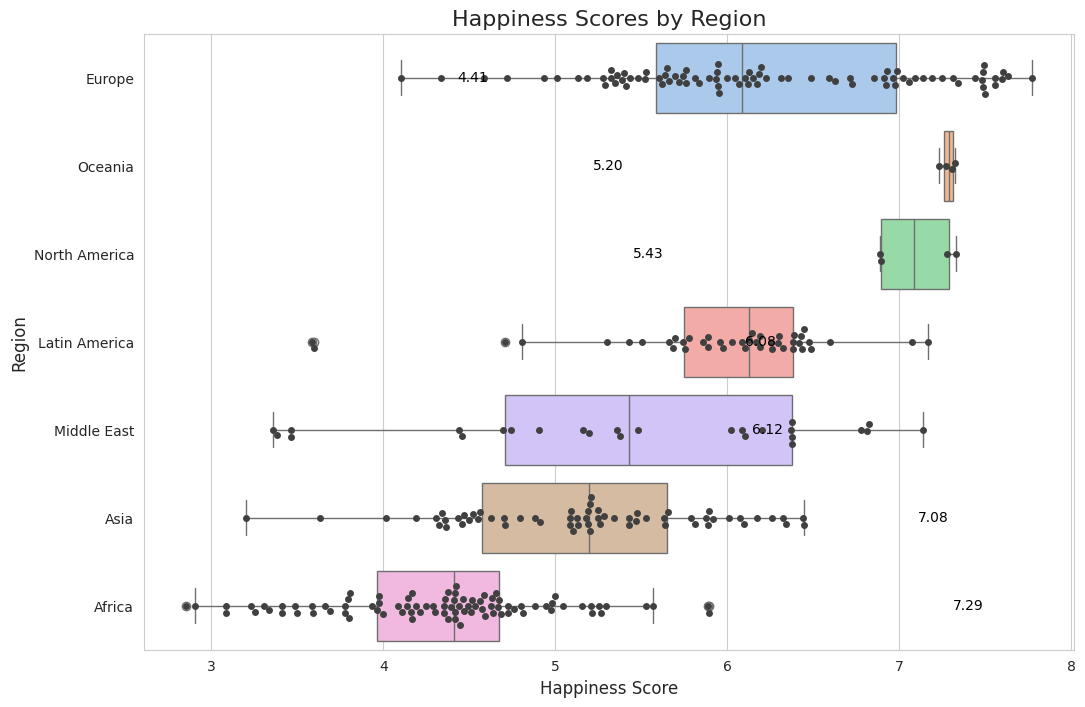

In [208]:
sns.set_style("whitegrid")

plt.figure(figsize=(12,8))

# Horizontal boxplot
sns.boxplot(
    data=df,
    y='Region',       # regions on y-axis
    x='Score',
    palette='pastel'
)

# Add individual points
sns.swarmplot(
    data=df,
    y='Region',
    x='Score',
    color='.25',      # dark grey points
    size=5
)

plt.title('Happiness Scores by Region', fontsize=16)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Region', fontsize=12)

# Optionally, label median values on the plot
medians = df.groupby('Region')['Score'].median().sort_values()
for i, region in enumerate(medians.index):
    plt.text(
        medians[region] + 0.02,  # slightly to the right of median
        i,                        # y-position
        f"{medians[region]:.2f}",
        va='center',
        fontsize=10,
        color='black'
    )

plt.show()


```
Prosperous countries in North America and Oceania have the highest levels of happiness.
Diverse regions such as Latin America and Africa have high deviations and outliers.
```



***Correlation Heatmap: Visualize the correlation between different factors using a heatmap.***

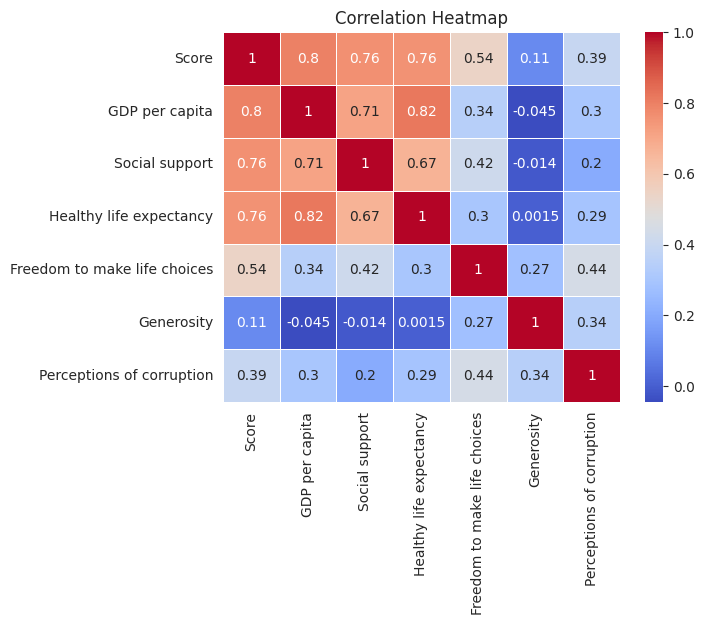

In [210]:
numeric_cols = ['Score', 'GDP per capita', 'Social support',
                'Healthy life expectancy', 'Freedom to make life choices',
                'Generosity', 'Perceptions of corruption']

corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


```
High positive correlation between Score and features such as GDP per capita, Social support, and Healthy life.
Perceptions of corruption are negatively correlated with Score.
But I haven't got what is Generosity?
```

